## Install Packages

In [1]:
install.packages(c("ggplot2", "dplyr", "gapminder"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Load Packages and data

In [26]:
library("dplyr")
library("ggplot2")
library("gapminder")

In [2]:
head(gapminder)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


## Common way to subset data
Using `dplyr::filter`

In [5]:
head(filter(gapminder, year == 2007))

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674


In [16]:
gapminder_asia_07 <- filter(gapminder, continent %in% c("Asia") & year == 2007)
head(gapminder_asia_07)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,2007,43.828,31889923,974.5803
Bahrain,Asia,2007,75.635,708573,29796.0483
Bangladesh,Asia,2007,64.062,150448339,1391.2538
Cambodia,Asia,2007,59.723,14131858,1713.7787
China,Asia,2007,72.961,1318683096,4959.1149
"Hong Kong, China",Asia,2007,82.208,6980412,39724.9787


## Pipe operations
`%>%` 如同 Unix 的 `｜`，把前一個 function 的 output 傳入下一個 function (第一個參數)。常搭配 `group_by` 使用。

In [23]:
gapminder %>%
  filter(continent == 'Asia' & year == 2007) %>%
  group_by(country) %>%
  summarize(medianPop = median(pop)) %>%
  head()

country,medianPop
Afghanistan,31889923
Bahrain,708573
Bangladesh,150448339
Cambodia,14131858
China,1318683096
"Hong Kong, China",6980412


## Basic Plot

In [24]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


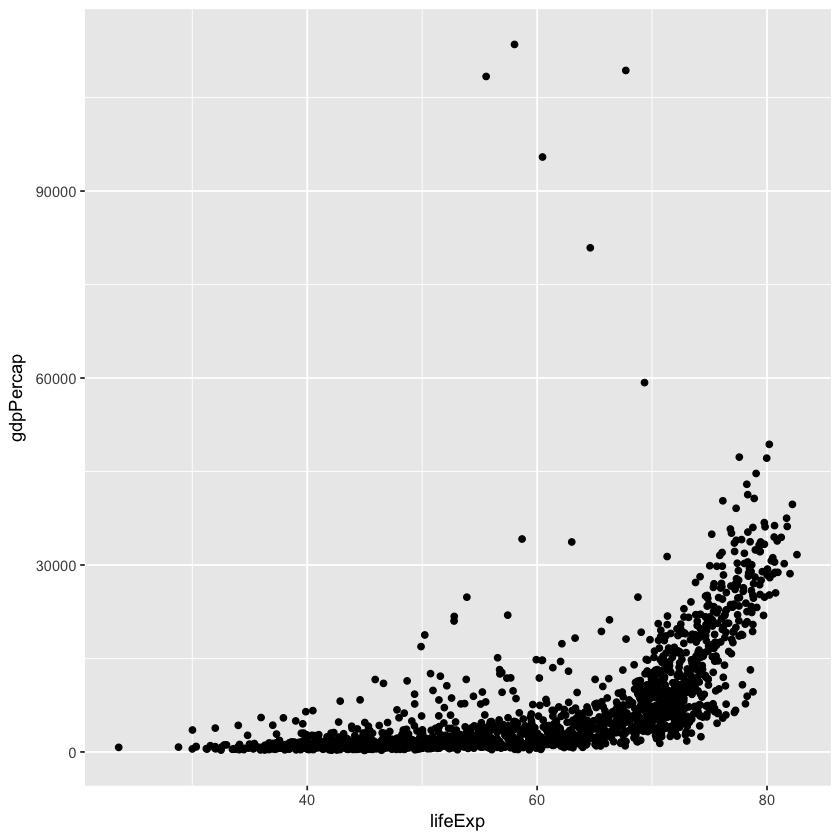

In [28]:
ggplot(gapminder, aes(x = lifeExp, y = gdpPercap)) +
  geom_point()

### geom_bar with overrided stat
假設我們想知道每個洲的國家的 gdpPercap 的中位數，以 Tidy Data 的條件來說，就是建立一個新的 data frame，每一列代表一個洲；有一行為各洲的 gdpPercap 中位數。

In [32]:
gap_median <- gapminder %>%
  group_by(continent) %>%
  summarize(gdpMedian = median(gdpPercap))

head(gap_median)

continent,gdpMedian
Africa,1192.138
Americas,5465.510
Asia,2646.787
Europe,12081.749
Oceania,17983.304


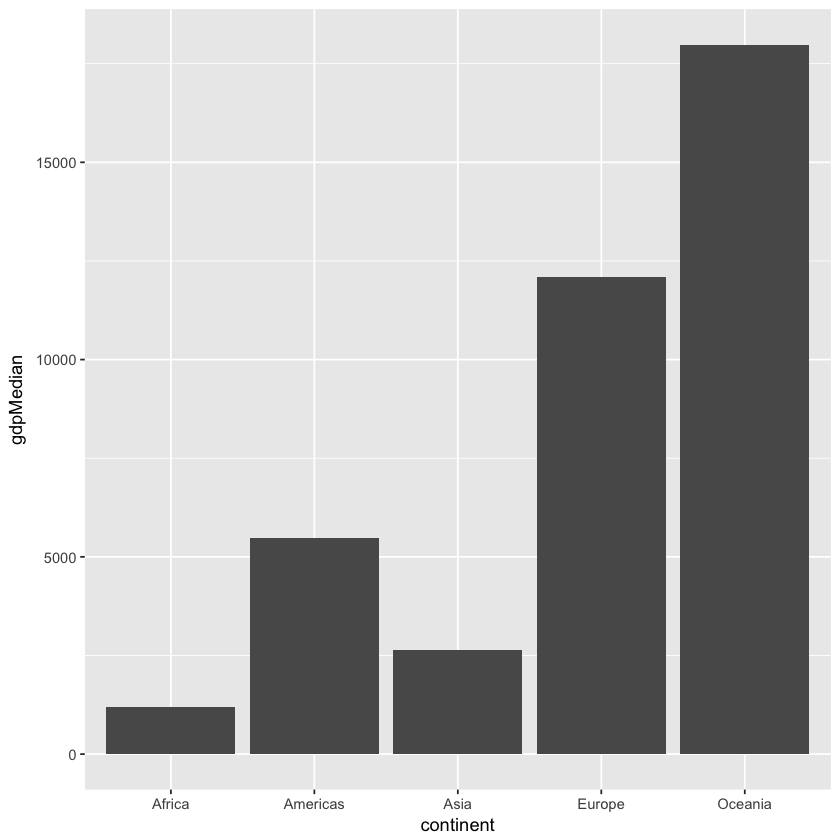

In [36]:
ggplot(gap_median, aes(x = continent, y = gdpMedian)) + geom_bar(stat = "identity")

## Showing Distribution of the data

### Histgrom

In [39]:
gap_07 <- filter(gapminder, year == 2007)
head(gap_07)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674


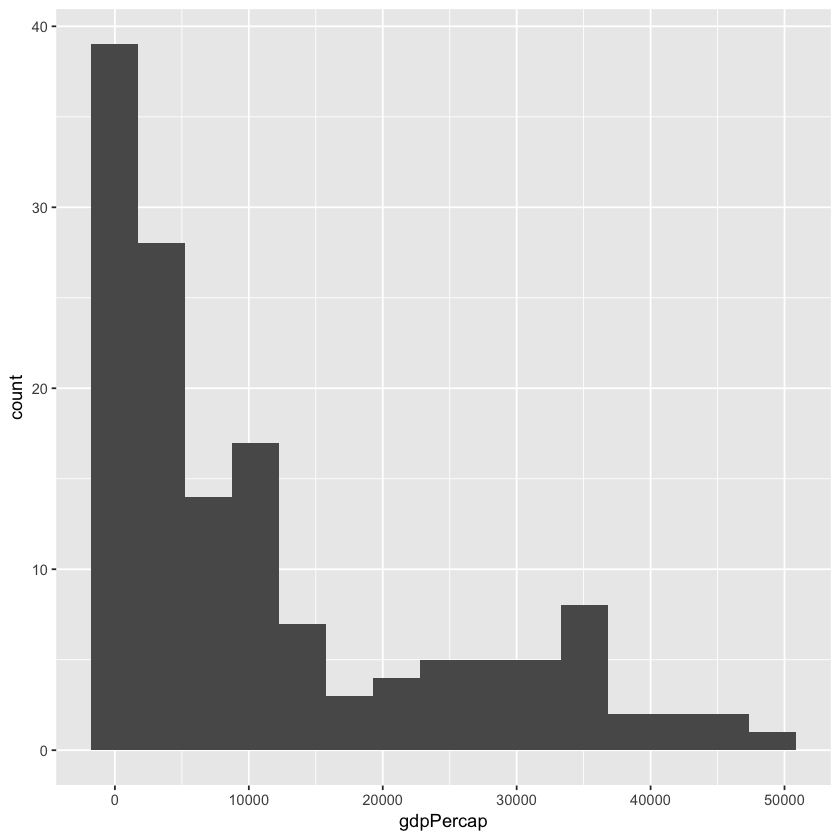

In [41]:
ggplot(gap_07, aes(x = gdpPercap)) +
  geom_histogram(bins = 15)

### Density Chart

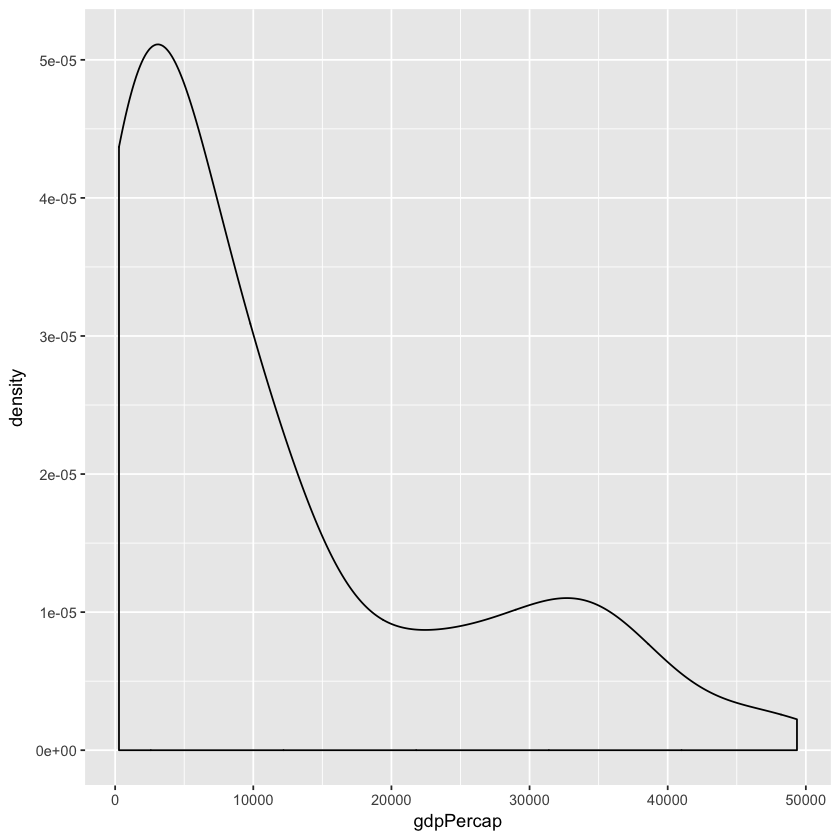

In [42]:
ggplot(gap_07, aes(x = gdpPercap)) +
  geom_density()

### Boxplot

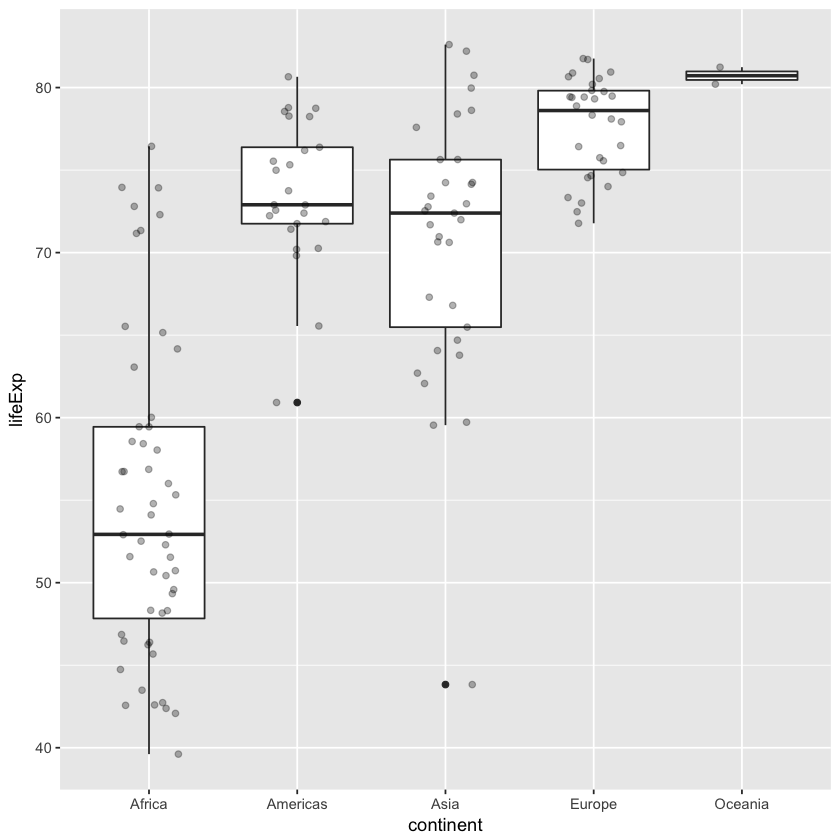

In [49]:
ggplot(gap_07, aes(x = continent, y = lifeExp)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.3)

## Add More Aesthetics: Color

### Example 1

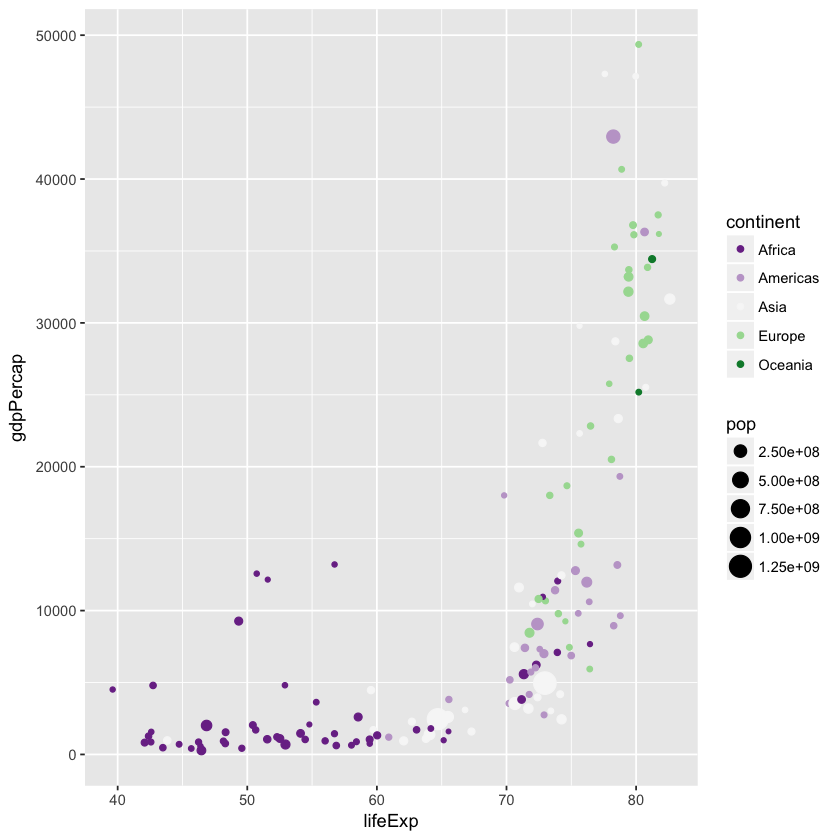

In [53]:
ggplot(gap_07, aes(x = lifeExp, y = gdpPercap, color = continent, size = pop)) +
  geom_point() + scale_colour_brewer(palette = "PRGn")

### Example 2
看五大洲每年的人口成長變化

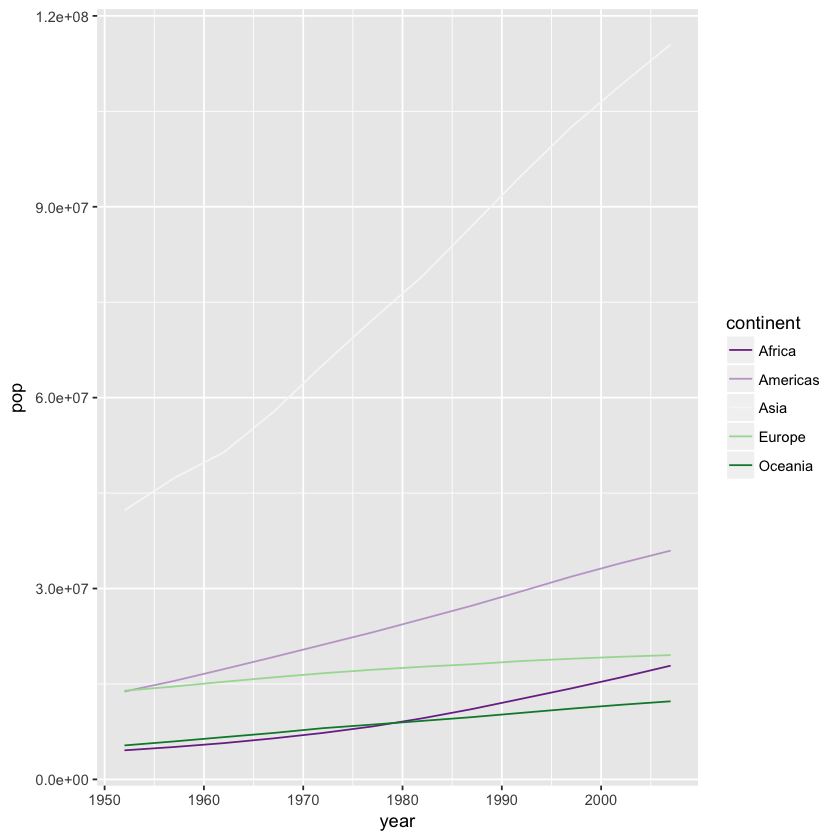

In [59]:
gapminder %>%
  group_by(continent, year) %>%
  summarize(pop = mean(pop)) %>%
  ggplot(aes(x = year, y = pop, color = continent)) +
  geom_line() + scale_colour_brewer(palette = "PRGn")